In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Visualization

Before cleaning, I explored the original dataset and wanted to inquire more about:

1. What is the most popular store_primary_category by time period?
2. Is there any correlation between the percentage of busy drivers (during order creation) and `estimated_travel_time`?
3. On average, how long does an order sit at the restaurant before pickup?

While defining time period, I queried the number of orders by hour and discovered that no orders were created during hours 9-14.  The location of these orders may help in understanding why there aren't any orders during this period, but noise was added to obfuscate business details and I am unable to inquire further.

This is one of many loose ends I found while working on this project and I do not have enough information to answer all three questions.  I've decided that visualizing (or performing EDA) on the dataset would not be an accurate representation of the data.  Instead, I'll visualize the discoveries I found while cleaning to better communicate the outliers I found.

In [5]:
hour_count = pd.read_csv("Exported CSVs/orders_by_hour.csv")

In [6]:
hour_count

,hour,count
0,0,5909
1,1,11384
2,2,21323
3,3,25559
4,4,17584
5,5,7705
6,6,2591
7,7,548
8,8,11
9,9,0


Text(0.5, 1.0, 'Number of Orders by Hour')

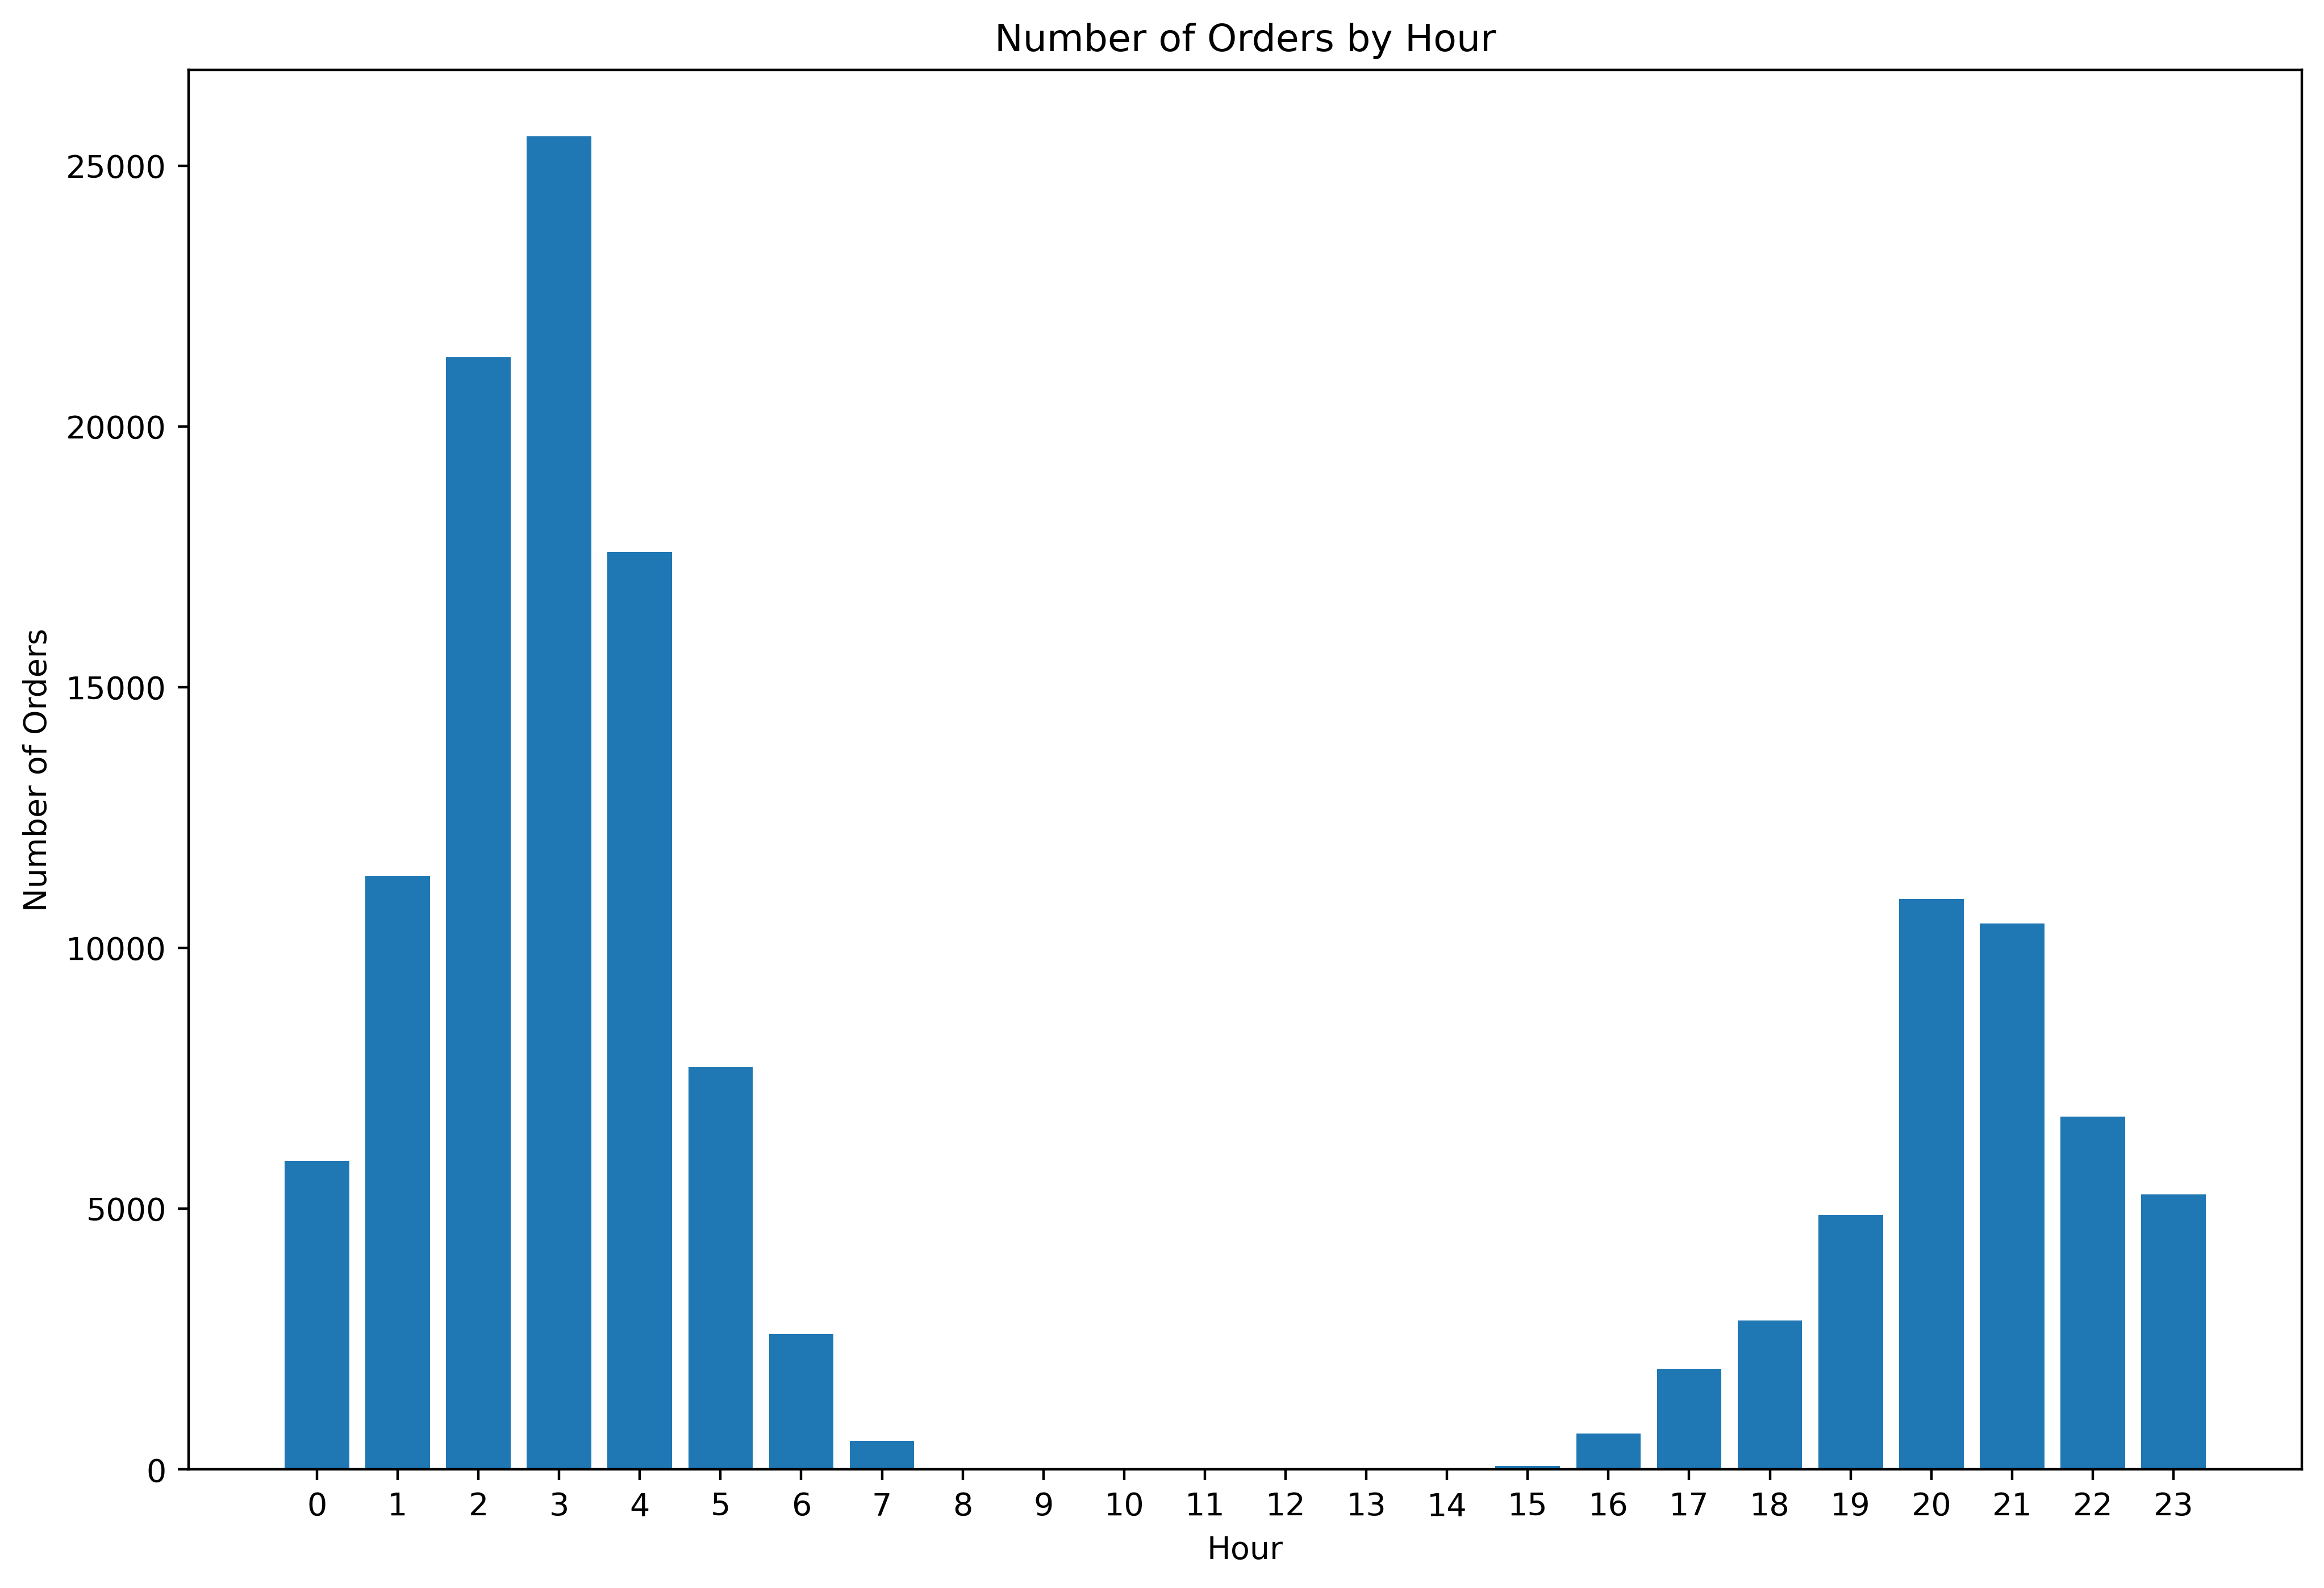

In [13]:
plt.figure(figsize=(12,8), dpi=400)

plt.bar(hour_count["hour"], hour_count["count"])

plt.xlabel("Hour")
plt.xticks(hour_count["hour"])
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Hour")

In [16]:
null_rows = pd.read_csv("Exported CSVs/null_rows.csv")

Text(0.5, 1.0, 'NaN % by Column')

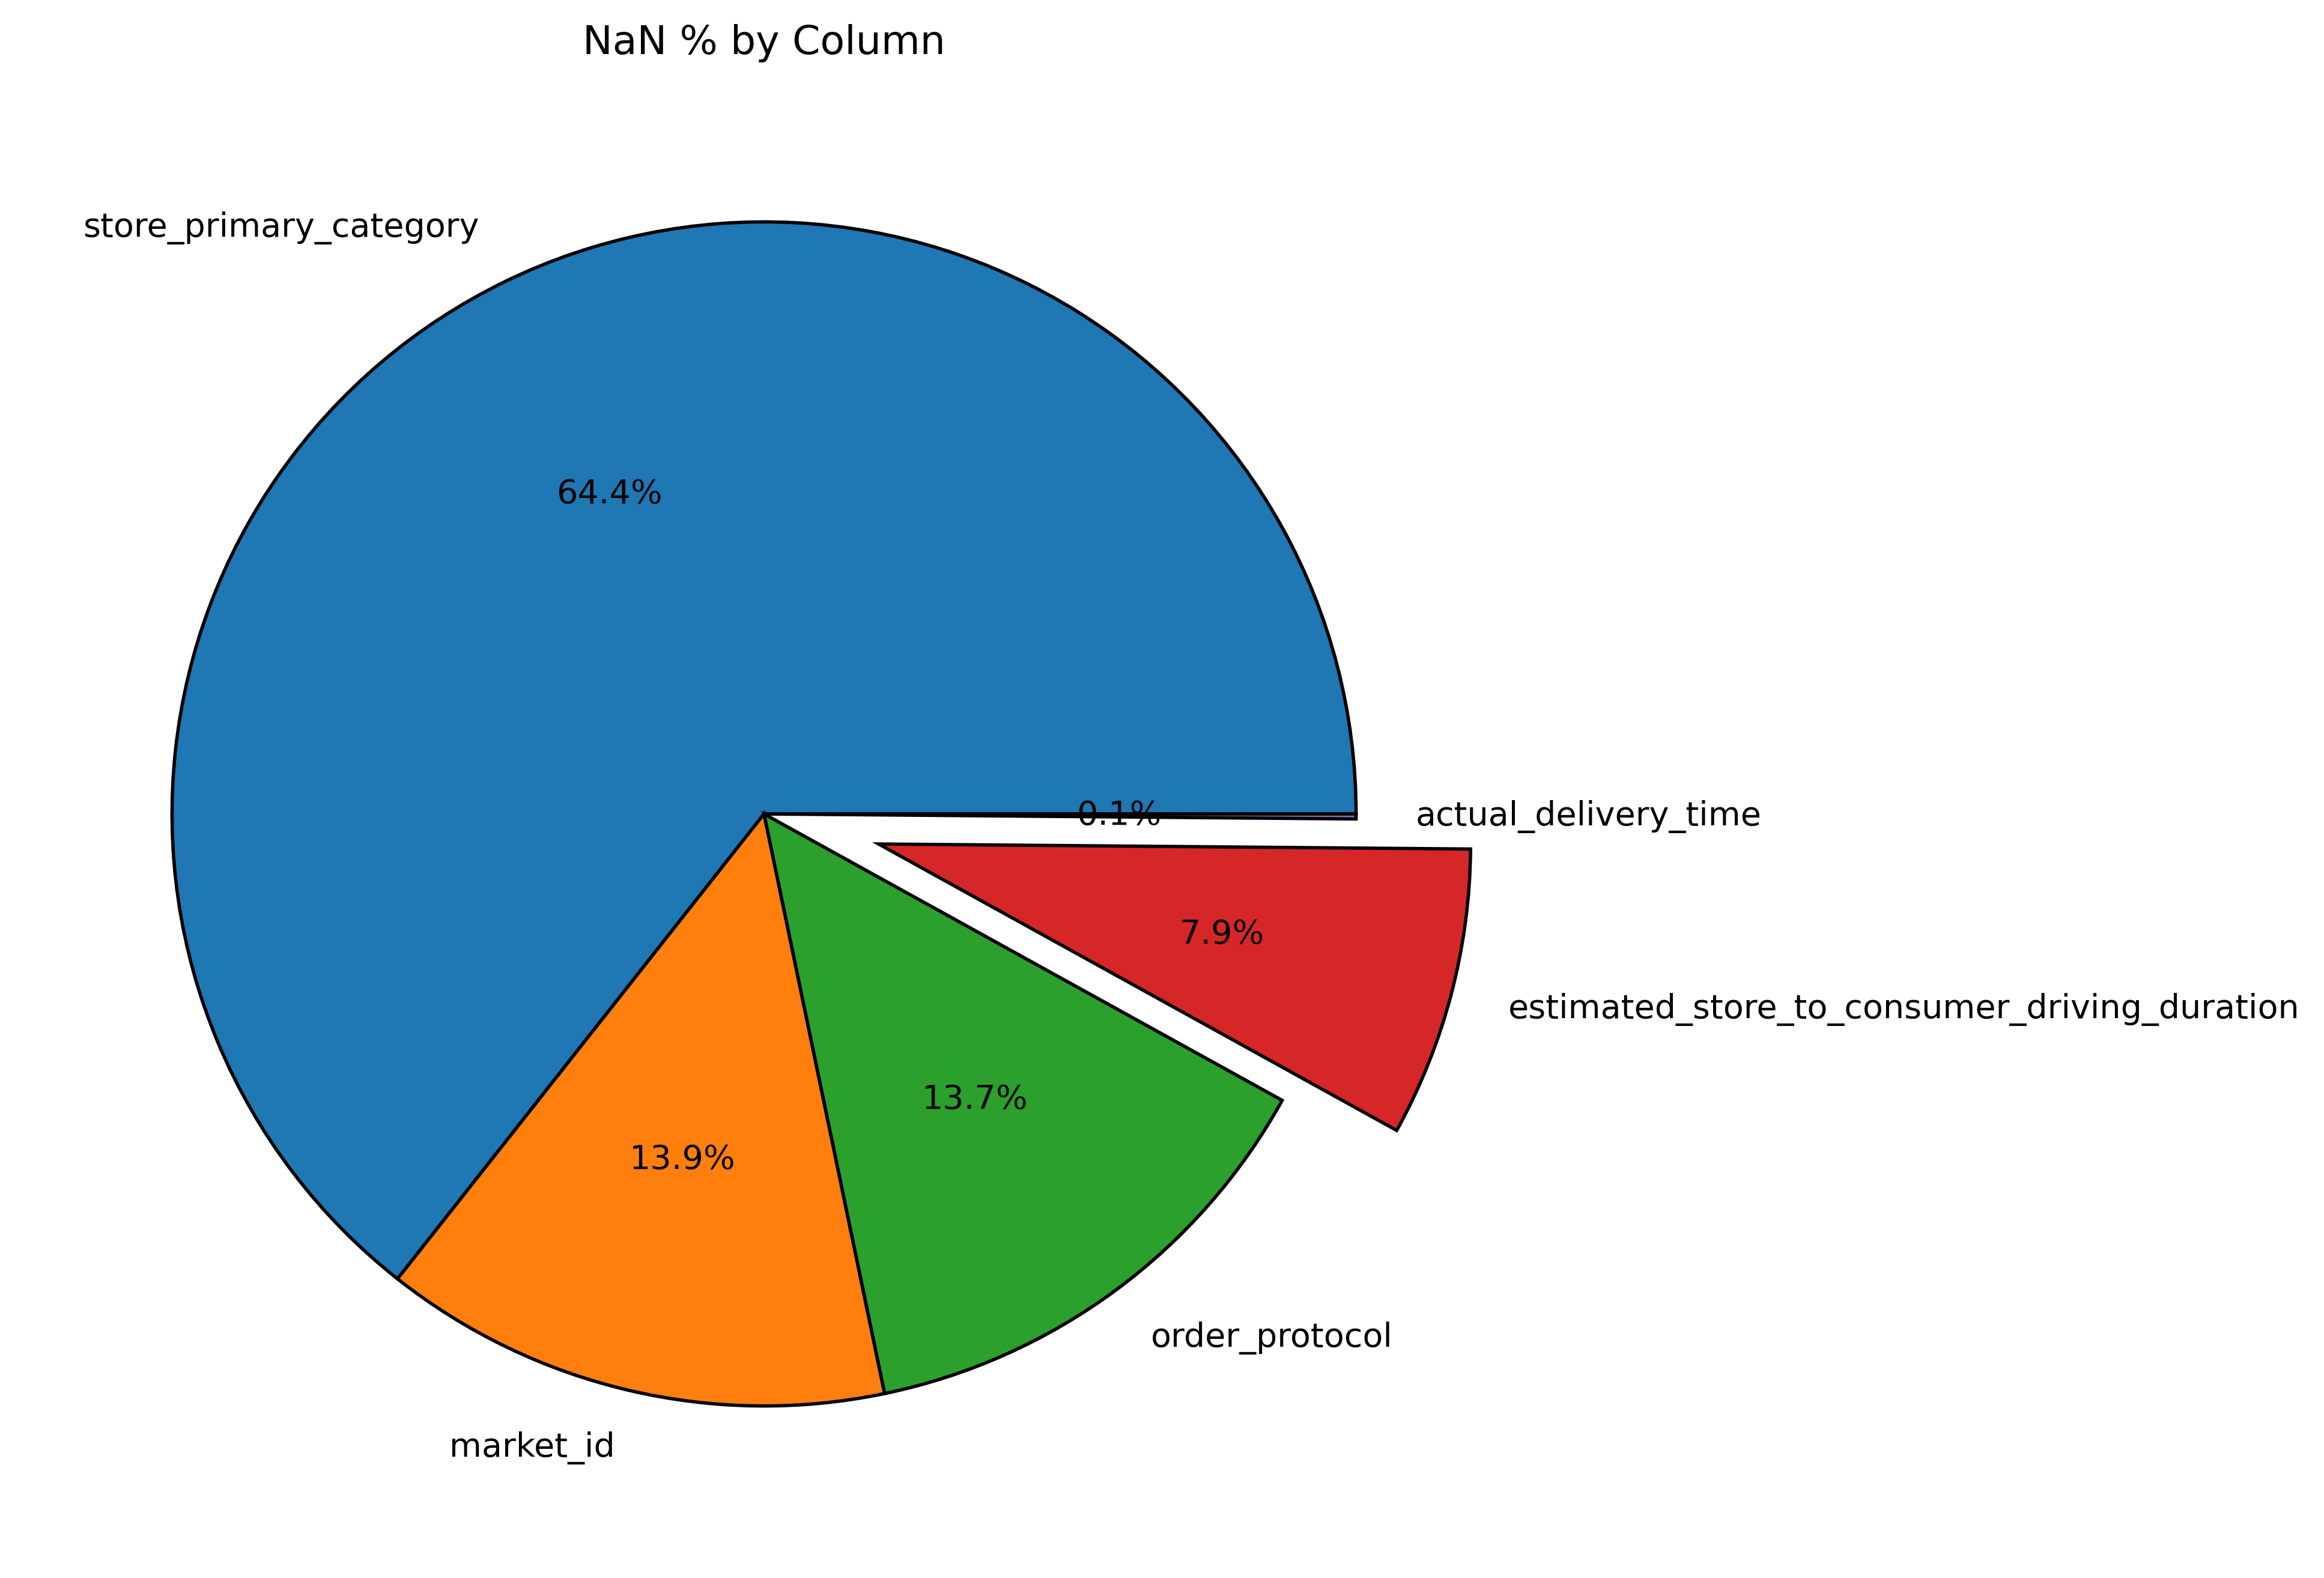

In [38]:
nan_count = null_rows.isna().sum()

nan_df = pd.DataFrame({"Column": nan_count.index, "NaN Count": nan_count.values})
nan_df = nan_df.sort_values(by="NaN Count", ascending=False)

top_5 = nan_df.iloc[:5]
labels = top_5["Column"]
explode = [0, 0, 0, 0.2, 0]

plt.figure(figsize=(10,8), dpi=400)
plt.pie(top_5["NaN Count"], labels=labels, wedgeprops={"edgecolor": "black"}, explode=explode,
    autopct="%1.1f%%")

plt.title("NaN % by Column")

In [78]:
# Reading in csv files.
negative_busy = pd.read_csv("Exported CSVs/negative_busy.csv")
negative_onshift = pd.read_csv("Exported CSVs/negative_onshift.csv")
negative_outstanding = pd.read_csv("Exported CSVs/negative_outstanding.csv")

In [81]:
busy_oneandthree = len(negative_busy[negative_busy["market_id"].isin([1, 3])])
onshift_oneandthree = len(negative_onshift[negative_onshift["market_id"].isin([1, 3])])
out_oneandthree = len(negative_outstanding[negative_outstanding["market_id"].isin([1, 3])])
busy_other = len(negative_busy[negative_busy["market_id"].isin([2, 4, 5, 6])])
onshift_other = len(negative_onshift[negative_onshift["market_id"].isin([2, 4, 5, 6])])
out_other = len(negative_outstanding[negative_outstanding["market_id"].isin([2, 4, 5, 6])])

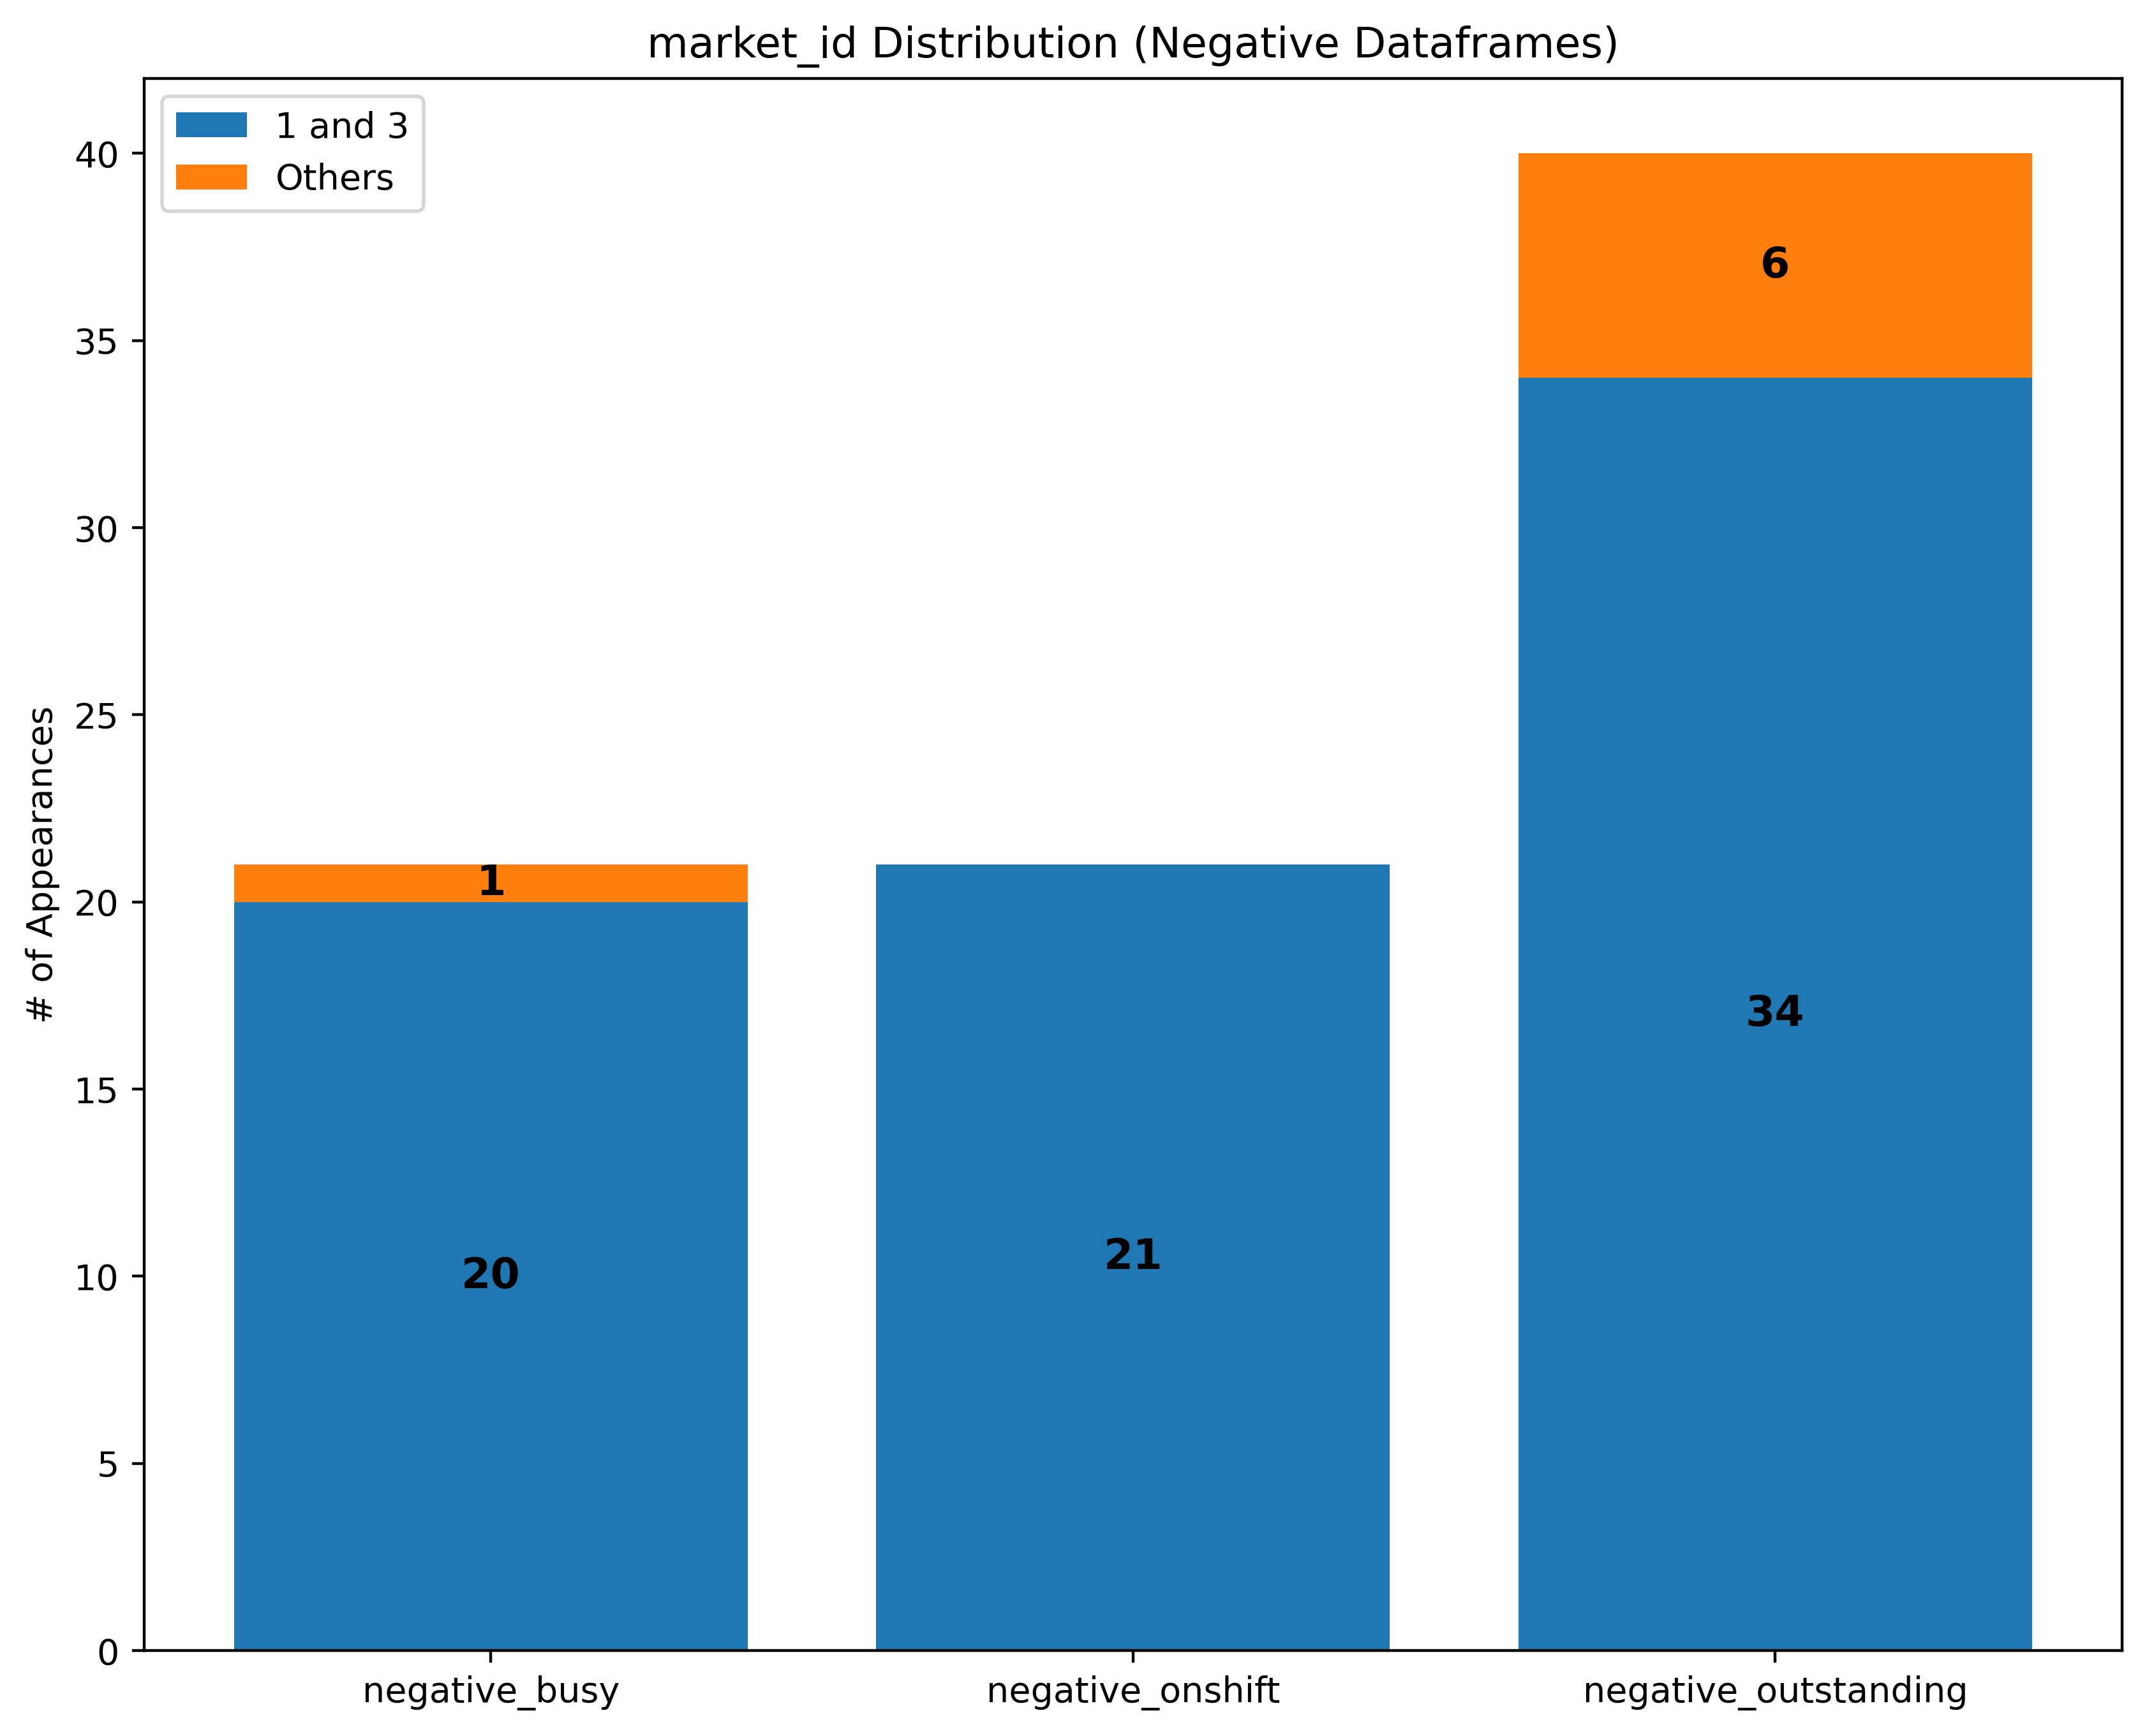

In [98]:
one_three = [busy_oneandthree, onshift_oneandthree, out_oneandthree]
others = [busy_other, onshift_other, out_other]
labels = ["negative_busy", "total_onshift_dashers", "negative_outstanding"]
legend = ["1 and 3", "Others"]

plt.figure(figsize=(10,8), dpi=400)
plt.bar(labels, one_three)
plt.bar(labels, others, bottom=one_three)

for i, val in enumerate(one_three):
    if val != 0:
        plt.text(i, val/2, str(val), ha='center', va='center', fontsize=12, fontweight='bold')

for i, val in enumerate(others):
    if val != 0:
        plt.text(i, one_three[i]+val/2, str(val), ha='center', va='center', fontsize=12, 
                 fontweight='bold')

plt.title("market_id Distribution (Negative Dataframes)")
plt.ylabel("# of Appearances")
plt.legend(legend)